In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

if __name__ == "__main__":
    df = pd.read_csv("aozora_8writers.csv",  delimiter=',')
    df["label"] = df.type.factorize()[0]
    df = shuffle(df)

    train_input_fn = tf.estimator.inputs.pandas_input_fn(
        df[:6000], df[:6000]["label"], num_epochs=None, shuffle=True)

    predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
        df[6000:], df[6000:]["label"], shuffle=False)

    embedded_text_feature_column = hub.text_embedding_column(
        key="text", 
        module_spec="https://tfhub.dev/google/nnlm-ja-dim128/1")

    estimator = tf.estimator.DNNClassifier(
        hidden_units=[512, 128],
        feature_columns=[embedded_text_feature_column],
        n_classes=8,
        optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

    estimator.train(input_fn=train_input_fn, steps=1000);
    test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
    print("Test set accuracy: {accuracy}".format(**test_eval_result))

INFO:tensorflow:Using default config.


I0527 23:11:40.858311 4663788992 estimator.py:1739] Using default config.


W0527 23:11:40.862740 4663788992 estimator.py:1760] Using temporary folder as model directory: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10e4dc190>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


I0527 23:11:40.866478 4663788992 estimator.py:201] Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10e4dc190>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


Instructions for updating:
Colocations handled automatically by placer.


W0527 23:11:40.884290 4663788992 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0527 23:11:40.905636 4663788992 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: __init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0527 23:11:40.911228 4663788992 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


I0527 23:11:40.921344 4663788992 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0527 23:11:40.948499 4663788992 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0527 23:11:40.982961 4663788992 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use tf.cast instead.


W0527 23:11:41.085021 4663788992 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/canned/head.py:436: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Done calling model_fn.


I0527 23:11:41.201968 4663788992 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0527 23:11:41.205569 4663788992 basic_session_run_hooks.py:527] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0527 23:11:41.381941 4663788992 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0527 23:11:42.351444 4663788992 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0527 23:11:43.028192 4663788992 session_manager.py:493] Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0527 23:11:43.050204 4663788992 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py:809: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt.


I0527 23:11:43.332696 4663788992 basic_session_run_hooks.py:594] Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt.


INFO:tensorflow:loss = 265.63025, step = 1


I0527 23:11:44.987490 4663788992 basic_session_run_hooks.py:249] loss = 265.63025, step = 1


INFO:tensorflow:global_step/sec: 168.246


I0527 23:11:45.581510 4663788992 basic_session_run_hooks.py:680] global_step/sec: 168.246


INFO:tensorflow:loss = 124.55029, step = 101 (0.598 sec)


I0527 23:11:45.585139 4663788992 basic_session_run_hooks.py:247] loss = 124.55029, step = 101 (0.598 sec)


INFO:tensorflow:global_step/sec: 197.94


I0527 23:11:46.086719 4663788992 basic_session_run_hooks.py:680] global_step/sec: 197.94


INFO:tensorflow:loss = 97.66344, step = 201 (0.505 sec)


I0527 23:11:46.090615 4663788992 basic_session_run_hooks.py:247] loss = 97.66344, step = 201 (0.505 sec)


INFO:tensorflow:global_step/sec: 200.091


I0527 23:11:46.586484 4663788992 basic_session_run_hooks.py:680] global_step/sec: 200.091


INFO:tensorflow:loss = 93.821266, step = 301 (0.500 sec)


I0527 23:11:46.590548 4663788992 basic_session_run_hooks.py:247] loss = 93.821266, step = 301 (0.500 sec)


INFO:tensorflow:global_step/sec: 184.016


I0527 23:11:47.129923 4663788992 basic_session_run_hooks.py:680] global_step/sec: 184.016


INFO:tensorflow:loss = 98.522736, step = 401 (0.544 sec)


I0527 23:11:47.134260 4663788992 basic_session_run_hooks.py:247] loss = 98.522736, step = 401 (0.544 sec)


INFO:tensorflow:global_step/sec: 153.015


I0527 23:11:47.783701 4663788992 basic_session_run_hooks.py:680] global_step/sec: 153.015


INFO:tensorflow:loss = 88.637405, step = 501 (0.656 sec)


I0527 23:11:47.790079 4663788992 basic_session_run_hooks.py:247] loss = 88.637405, step = 501 (0.656 sec)


INFO:tensorflow:global_step/sec: 182.587


I0527 23:11:48.331176 4663788992 basic_session_run_hooks.py:680] global_step/sec: 182.587


INFO:tensorflow:loss = 80.89671, step = 601 (0.545 sec)


I0527 23:11:48.335525 4663788992 basic_session_run_hooks.py:247] loss = 80.89671, step = 601 (0.545 sec)


INFO:tensorflow:global_step/sec: 177.171


I0527 23:11:48.895561 4663788992 basic_session_run_hooks.py:680] global_step/sec: 177.171


INFO:tensorflow:loss = 65.39999, step = 701 (0.564 sec)


I0527 23:11:48.899192 4663788992 basic_session_run_hooks.py:247] loss = 65.39999, step = 701 (0.564 sec)


INFO:tensorflow:global_step/sec: 167.256


I0527 23:11:49.493443 4663788992 basic_session_run_hooks.py:680] global_step/sec: 167.256


INFO:tensorflow:loss = 59.248672, step = 801 (0.599 sec)


I0527 23:11:49.497710 4663788992 basic_session_run_hooks.py:247] loss = 59.248672, step = 801 (0.599 sec)


INFO:tensorflow:global_step/sec: 187.983


I0527 23:11:50.025409 4663788992 basic_session_run_hooks.py:680] global_step/sec: 187.983


INFO:tensorflow:loss = 80.93761, step = 901 (0.531 sec)


I0527 23:11:50.029079 4663788992 basic_session_run_hooks.py:247] loss = 80.93761, step = 901 (0.531 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt.


I0527 23:11:50.578362 4663788992 basic_session_run_hooks.py:594] Saving checkpoints for 1000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt.


INFO:tensorflow:Loss for final step: 72.80467.


I0527 23:11:52.797492 4663788992 estimator.py:359] Loss for final step: 72.80467.


INFO:tensorflow:Calling model_fn.


I0527 23:11:52.825457 4663788992 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0527 23:11:52.847740 4663788992 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0527 23:11:52.892612 4663788992 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0527 23:11:53.078054 4663788992 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-05-27T14:11:53Z


I0527 23:11:53.098929 4663788992 evaluation.py:257] Starting evaluation at 2019-05-27T14:11:53Z


INFO:tensorflow:Graph was finalized.


I0527 23:11:53.198798 4663788992 monitored_session.py:222] Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0527 23:11:53.203357 4663788992 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt-1000


I0527 23:11:53.207514 4663788992 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0527 23:11:53.903096 4663788992 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0527 23:11:54.588599 4663788992 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-05-27-14:11:55


I0527 23:11:55.102742 4663788992 evaluation.py:277] Finished evaluation at 2019-05-27-14:11:55


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.80025774, average_loss = 0.6160423, global_step = 1000, loss = 73.545975


I0527 23:11:55.106127 4663788992 estimator.py:1979] Saving dict for global step 1000: accuracy = 0.80025774, average_loss = 0.6160423, global_step = 1000, loss = 73.545975


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt-1000


I0527 23:11:55.236087 4663788992 estimator.py:2039] Saving 'checkpoint_path' summary for global step 1000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt-1000


Test set accuracy: 0.800257742405


INFO:tensorflow:Calling model_fn.


I0527 23:14:57.352940 4663788992 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0527 23:14:57.382975 4663788992 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0527 23:14:57.440551 4663788992 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0527 23:14:57.677269 4663788992 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Graph was finalized.


I0527 23:14:57.814585 4663788992 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt-1000


I0527 23:14:57.819307 4663788992 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp2z0vbD/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0527 23:14:58.500550 4663788992 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0527 23:14:59.020855 4663788992 session_manager.py:493] Done running local_init_op.


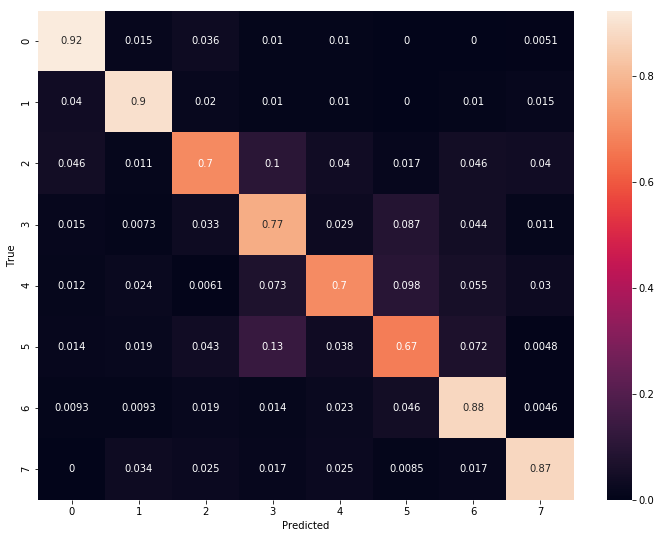

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = range(8)

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(df[6000:]["label"], 
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))
sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");